In [1]:
import my_module as mm
nets = []
convs = [8, 16, 32, 64]
fcs = [256, 64, 16]
device = mm.torch.device('cuda' if mm.torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [2]:
count = 0
DIR_PATH = './model/change_layer_disto/'
for i in range(2, -1, -1):
    for j in range(1, 5):
        net = mm.Net(1, 350, 350, 8, convs[:j], fcs[i:])
        count += 1
        PATH = DIR_PATH + "model_" + str(count)
        net.load_state_dict(mm.torch.load(PATH))
        nets.append(net)
print("Done")

Done


In [3]:
categories = [
    "anger",
    "surprise",
    "disgust",
    "fear",
    "neutral",
    "happiness",
    "sadness",
    "contempt"
]

X, y = mm.read_pic(mm.pd.read_csv('data/legend.csv'), categories)
seed = 1234
Xtr, Xva, ytr, yva = mm.train_test_split(X, y, test_size=0.2, random_state=seed)
trainloader, testloader = mm.get_loader(Xtr, Xva, ytr, yva)
print("Done")

Done


In [4]:
training_error = []
testing_error = []
count = 0
for net in nets:
    if mm.torch.cuda.is_available():
        net.cuda()
    training_error.append(1 - mm.accuracy(device, net, trainloader))
    testing_error.append(1 - mm.accuracy(device, net, testloader))
    count += 1
    print("Done for model", count)

Done for model 1
Done for model 10
Done for model 11
Done for model 12


[0.5867421475529584, 0.49689554419284154, 0.6112125639152666, 0.593681519357195, 0.5214572680788897, 0.49634769905040177, 0.4966216216216216, 0.4962563915266618, 0.49643900657414175, 0.4971694667640614, 0.49634769905040177, 0.4962563915266618]
[0.5726807888970051, 0.5073046018991965, 0.5956902848794741, 0.5785244704163623, 0.5233747260774289, 0.506208911614317, 0.5069393718042366, 0.5065741417092768, 0.506208911614317, 0.5069393718042366, 0.5065741417092768, 0.5065741417092768]


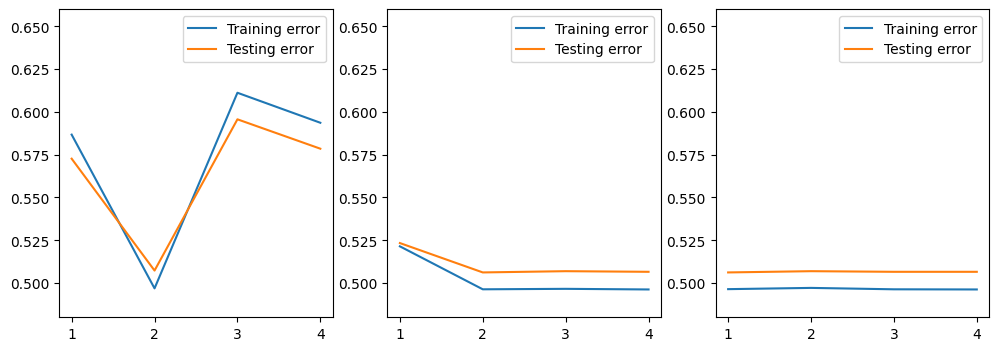

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,3, figsize=(12,4))

print(training_error)
print(testing_error)

M = [1, 2, 3, 4]

for i in range(3):
    l = i * 4
    r = i * 4 + 4
    ax[i].plot(M, training_error[l:r], label="Training error")
    ax[i].plot(M, testing_error[l:r], label="Testing error")
    ax[i].legend()
    ax[i].set_ylim(0.48, 0.66)

# The output is wrong, just for debugging